# <h2>Task-4</h2>
<h3>Aim</h3>
<p>The aim of this project is to develop a sales prediction model for predicting future sales using various data points.</p>
<h3>Dataset used</h3>
<p>Advertising</p>
<br>
<p>This model will analyze various factors like advertising spend and customer segments to forecast future sales in business. With this knowledge, we will empower to optimize advertising strategies, maximize sales potential, and make data-driven decisions regarding marketing investments.</p>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
data = pd.read_csv(r"C:\Users\Hp\Downloads\advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [9]:
print(data.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


C:\Users\Hp\anaconda1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


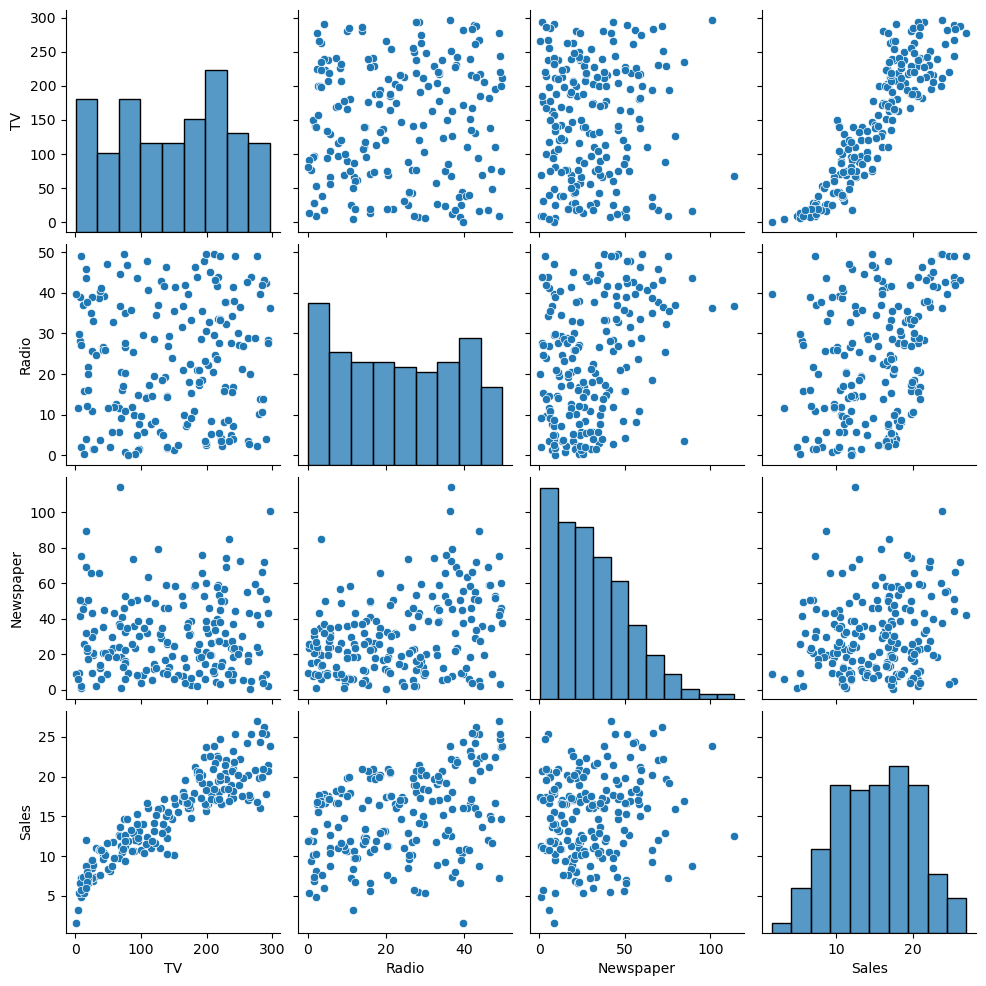

In [10]:
# Pairplot to visualize relationships
sns.pairplot(data)
plt.show()

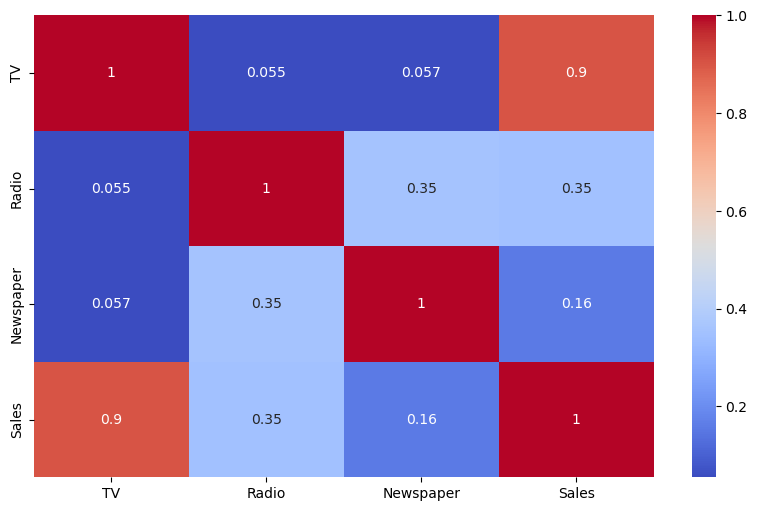

In [11]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Define features and target variable
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest MAE: {mae_rf}')
print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest R2: {r2_rf}')

Random Forest MAE: 0.9179999999999993
Random Forest MSE: 1.4374328500000009
Random Forest R2: 0.9534827934927883


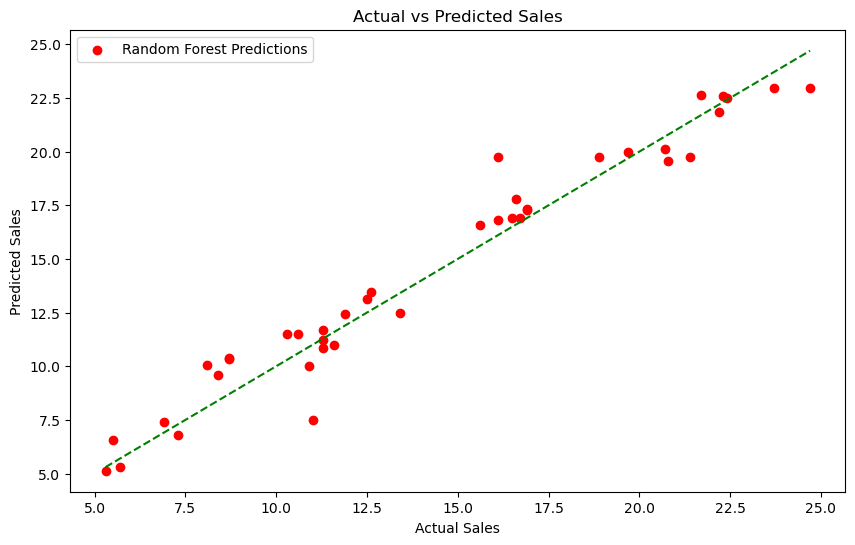

In [14]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='red', label='Random Forest Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

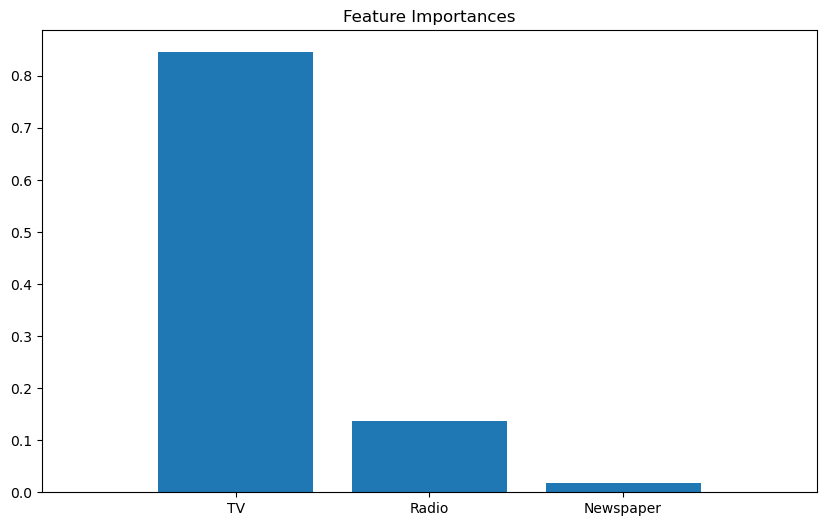

In [15]:
# Feature importance visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices])
plt.xlim([-1, X.shape[1]])
plt.show()

# 

# Inference

By using the Random Forest Regressor, we achieved better predictive performance for future sales compared to Linear Regression, as indicated by lower Mean Absolute Error (MAE: 0.918), lower Mean Squared Error (MSE: 1.437), and higher R-squared (R2: 0.953). The visualizations confirmed the model's accuracy, showing a close match between actual and predicted sales values. Additionally, feature importance analysis revealed which advertising expenditures (TV, Radio, Newspaper) most significantly influence sales, providing actionable insights for optimizing advertising strategies to maximize sales.